# Example usage of the BTD class

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import pybbtd.btd as btd
from pybbtd.solvers import btd_als
import tensorly as tly
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Generate BTD model
X = btd.BTD([100, 100, 10], 4, 2, block_mode="LL1")

Sufficient condition for uniqueness satisfied


In [26]:
# create ground truth tensor
np.random.seed(1)
A0, B0, C0 = btd_als.init_BTD_factors(X, strat='random')
theta = X.get_constraint_matrix()
Trec = btd.factors_to_tensor(A0, B0, C0, theta, block_mode='LL1')

Reached absolute tolerance threshold. Exiting.


Text(0.5, 0, 'iteration number')

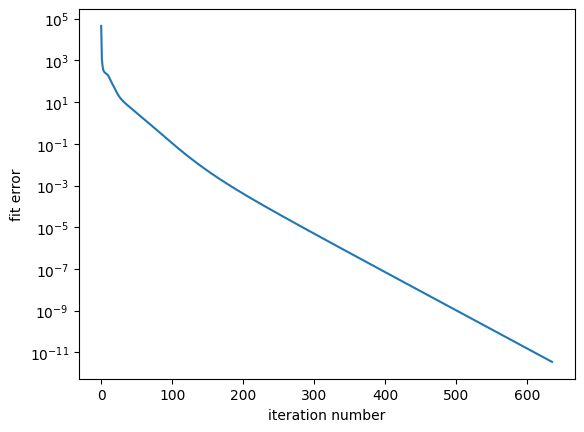

In [27]:
# perform the fit and display the error
X.fit(Trec, abs_tol=1e-14)

fig, ax = plt.subplots()
ax.semilogy(X.fit_error)
ax.set_ylabel('fit error')
ax.set_xlabel('iteration number')